[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

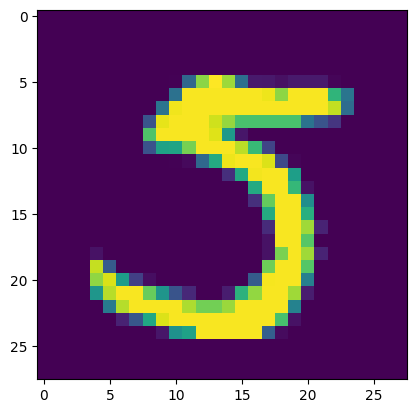

tensor(5)


In [6]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt 

train= datasets.MNIST("", download=True, train= True, transform=transforms.Compose([transforms.ToTensor()]))
test= datasets.MNIST("", train= False, download= True, transform=transforms.Compose([transforms.ToTensor()]))

trainset= torch.utils.data.DataLoader(train, batch_size=10, shuffle= True)
testset= torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

#printing 1st batch of trainset
for data in trainset:
    print(data)
    break

#Cross-checking say 4th image of the 1st batch with its output
a,b= data[0][4], data[1][4]

plt.imshow(a.view(28,28))
plt.show()
print(b)

In [8]:
import torch.nn as nn 
import torch.nn.functional as F
#training the model using CNN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,3)
        self.conv2=nn.Conv2d(32,64,3)
        self.conv3=nn.Conv2d(64,128,3)

        x=torch.randn(28,28).view(-1,1,28,28)
        self._to_linear=None
        self.convs(x)

        self.fc1=nn.Linear(self._to_linear,512)
        self.fc2=nn.Linear(512,64)
        self.fc3=nn.Linear(64,10)#final output is a class of 10 digits

    def convs(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        if self._to_linear is None:
            self._to_linear=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    
    def forward(self,x):
        x=self.convs(x)
        x=x.view(-1,self._to_linear)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.softmax(x,dim=1)
    
net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
import torch.optim as optim 
optimizer= optim.Adam(net.parameters(), lr=0.001)

EPOCHS=3


for epoch in range(EPOCHS):
    for data in trainset:
        X,y= data
        net.zero_grad()
        output= net(X.view(-1,1,28,28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
        
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,1,28,28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy of CNN:", round(correct/total,3))



Accuracy of CNN: 0.958


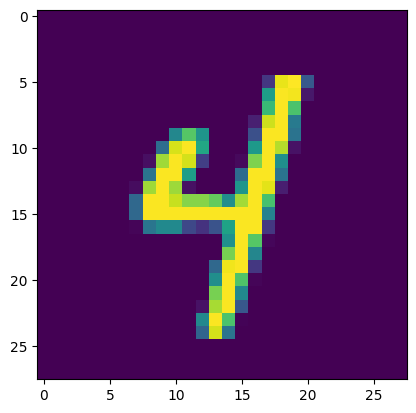

tensor(4)


In [10]:
import matplotlib.pyplot as plt 
plt.imshow(X[3].view(28,28))
plt.show()
print(torch.argmax(net(X[3].view(-1,28,28))))